### Notebook to test OptoSim photon transport

In [1]:
import sys
sys.path.insert(0,'../python/')
from OpticalPhoton import *
import matplotlib.pyplot as plt
import matplotlib as mpl

import json

#### Setup the system geometry

In [20]:
filename = 'testit.json'
# done through the config file.....
config = {
    "filename": "dummy.hd5f",
    "nevents": 100,
    "nphoton_per_event": 110000,
    "geometry": {
        "radius": 2.5,
        "ztop": 1.0,
        "zliq": 0.0,
        "zbot": -10.0
    }
}

with open(filename, "w") as json_file:
    json.dump(config, json_file, indent=4)

#### Setup the simulation parameters

In [28]:
x0 = (0., 1., 0.1) # starting position of the photons

no_scatter = False # set to True if you want to compare to a case without scattering
experimental_scatter_model = True # model for scattering from GXe/LXe on PTFE

#### Simulate photon transport

In [29]:
%%time
myPhoton = OpticalPhoton(config='testit.json')
myPhoton.config['n_photon_per_event'] = 10000
# if you want to compare your result to the no-scatter case
myPhoton.set_no_scattering(no_scatter)
# turn ON/OFF the GXe/GXe -> PTFE scattering model
myPhoton.set_experimental_scatter_model(experimental_scatter_model)

xb = []
yb = []
xt = []
yt = []


for i in range(config['nphoton_per_event']):
    if i%10000 == 0:
        print('processed ',i,' photons')
    # normal
    myPhoton.generate_photon(x0=x0)
    #myPhoton.set_photon_direction(np.array([0,0,-1]))
    myPhoton.propagate()
    
    if myPhoton.is_detected():
        x = myPhoton.get_photon_position()
        #myPhoton.print()
        if x[2]<0:
            xb.append(x[0])
            yb.append(x[1])
        else:
            xt.append(x[0])
            yt.append(x[1])

    
xb = np.array(xb)
yb = np.array(yb)
xt = np.array(xt)
yt = np.array(yt)

print(len(xb), len(xt))

OpticalPhoton::Reading configuration from file: testit.json
processed  0  photons
processed  10000  photons
processed  20000  photons
processed  30000  photons
processed  40000  photons
processed  50000  photons
processed  60000  photons
processed  70000  photons
processed  80000  photons
processed  90000  photons
processed  100000  photons
27279 37893
CPU times: user 25.5 s, sys: 127 ms, total: 25.6 s
Wall time: 32.6 s


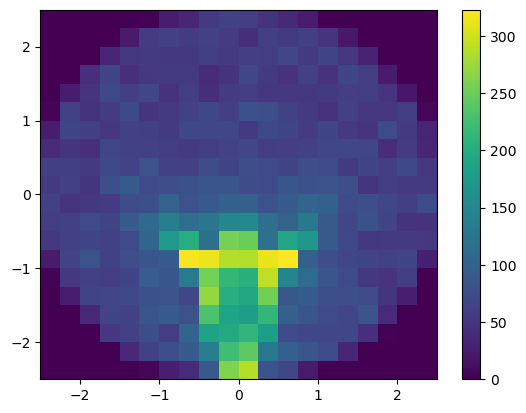

In [30]:
R = config['geometry']['radius']
a=1
h2=plt.hist2d(xb,yb,bins=(20,20),range=((-a*R,a*R),(-a*R,a*R)))#, norm=mpl.colors.LogNorm())
plt.colorbar()

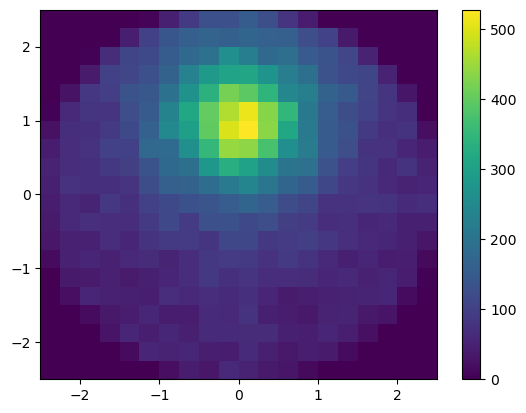

In [31]:
h2=plt.hist2d(xt,yt,bins=(20,20),range=((-R,R),(-R,R)))#, norm=mpl.colors.LogNorm())
plt.colorbar()

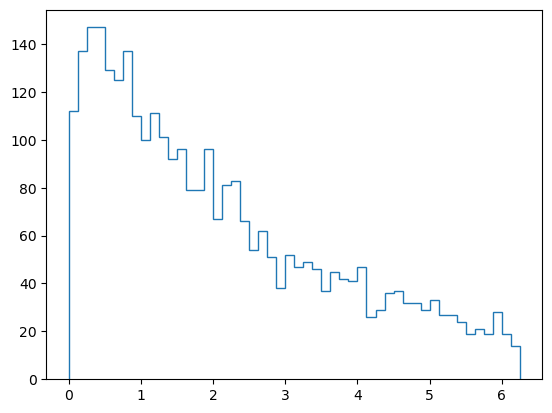

In [7]:
plt.hist((xt**2+yt**2),bins=50,range=(0,R**2), histtype='step')
# plt.hist(yb,bins=50,range=(-R,R), histtype='step')
plt.yscale('linear')

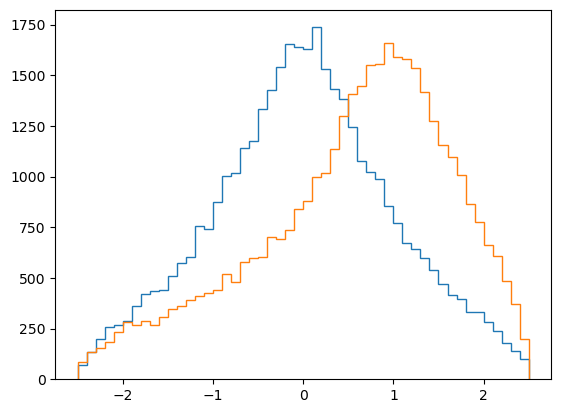

In [32]:
plt.hist(xt,bins=50,range=(-R,R), histtype='step')
plt.hist(yt,bins=50,range=(-R,R), histtype='step')


plt.yscale('linear')

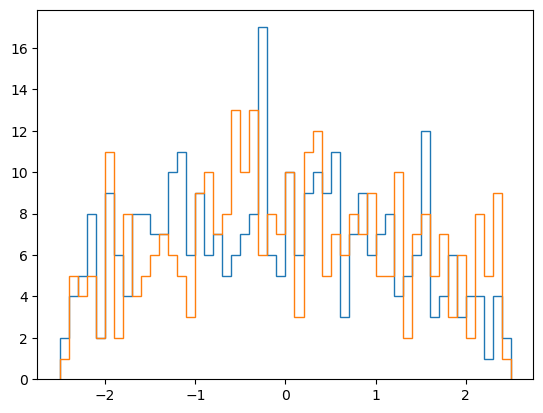

In [9]:
plt.hist(xb,bins=50,range=(-R,R), histtype='step')
plt.hist(yb,bins=50,range=(-R,R), histtype='step')


plt.yscale('linear')

In [10]:
import h5py